*There are many difficult courses on the economics study on the University of Copenhagen. One of the exams with lowest grade distributions is the course "Microeconomics I".  
We went to the exam on the 16th. january 2018, and we figured that solving and simulating the cournot-duopoly model as it was presented in the first assignment, would be our model of  interest. We will be comparing the results with the Stackelberg competition model, as this was a follow up question. This model can be seen as an extension to the Cournot model. We will first derive the general expressions and equations then we will plot using values from the exam. Lastly we will solve the model wrt. to output quantities, numerically.*




In [17]:
###################################################################################
### Importing relevant packages and making sure that sympy print-outs look neat ###
###################################################################################
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

sm.init_printing(use_unicode=True)

In [18]:
###################################################################################
#################### Creating relevant notation and variables #####################
###################################################################################
profita = sm.symbols("pi_A")
mca = sm.symbols("MC_A")
qa = sm.symbols("q_A")
profitb = sm.symbols("pi_B")
mcb = sm.symbols("MC_B")
qb = sm.symbols("q_B")
q = sm.symbols("Q")
p = sm.symbols("P")
d = sm.symbols("D(P)")
a = sm.symbols("alpha")
b = sm.symbols("beta")

#Testing notatition
profita, mca, qa, q, p, d, a, b

In [19]:
###################################################################################
############# Defining demand function, and defininig total quantity ##############
###################################################################################

# Pr. definition, total quantity is equal to the output of alle the firms (i.e. firm A & B)
q = qa + qb
demand = sm.Eq(q, a - b*p)


#We would now like to find the invese demand function.
inv_demand = sm.solve(demand,p)[0]


#Saving equations for later

print_inv_demand = sm.Eq(p, inv_demand)
demand, print_inv_demand

In [20]:
###################################################################################
################ Defining maximization problem for the firm A & B #################
###################################################################################

#Both firms take each others actions into account.  
profitsa_print = sm.Eq(profita, (p-mca)*qa)
profitsb_print = sm.Eq(profitb, (p-mcb)*qb)
profits_matrix = sm.Matrix([profitsa_print, profitsb_print])
profits_matrix

⎡π_A = q_A⋅(-MC_A + P)⎤
⎢                     ⎥
⎣π_B = q_B⋅(-MC_B + P)⎦

In [21]:
###################################################################################
############### Inserting inverse demand in maximization problems #################
###################################################################################

profitsa = sm.Eq(profita, (inv_demand-mca)*qa)
profitsb = sm.Eq(profitb, (inv_demand-mcb)*qb)
matrix_profits = sm.Matrix([profitsa, profitsb])
matrix_profits

⎡          ⎛        α - q_A - q_B⎞⎤
⎢π_A = q_A⋅⎜-MC_A + ─────────────⎟⎥
⎢          ⎝              β      ⎠⎥
⎢                                 ⎥
⎢          ⎛        α - q_A - q_B⎞⎥
⎢π_B = q_B⋅⎜-MC_B + ─────────────⎟⎥
⎣          ⎝              β      ⎠⎦

Now that the profit maximization problems are specified, the firms choose the quantity they want to produce.
This is done by differentiating the profit maximization problems wrt. to firm quantity. I.e. firm a chooses quantity A.

In [6]:
###################################################################################
######################## Maximizing profit functions ##############################
###################################################################################

foca = sm.diff((inv_demand-mca)*qa,qa)
focb = sm.diff((inv_demand-mcb)*qb,qb)
foca_print = sm.Eq(foca, 0)
focb_print = sm.Eq(focb, 0)
matrix_foc = sm.Matrix([foca_print, focb_print])
matrix_foc

⎡        q_A   α - q_A - q_B    ⎤
⎢-MC_A - ─── + ───────────── = 0⎥
⎢         β          β          ⎥
⎢                               ⎥
⎢        q_B   α - q_A - q_B    ⎥
⎢-MC_B - ─── + ───────────── = 0⎥
⎣         β          β          ⎦

In [7]:
###################################################################################
########################## Solving system of 2 equations ##########################
###################################################################################

sola = sm.solve(foca,qa)
solb = sm.solve(focb,qb)


#We now have a system of 2 equations and 2 unknowns. Solving the system:

sol = sm.solve([foca,focb],[qa,qb])

#saving solution for A and B (for later, since easier)
solution_a = sol[qa]
solution_b = sol[qb]
#for print outs
EQa = sm.Eq(qa, solution_a)
EQb = sm.Eq(qb, solution_b)

matrix_solve = sm.Matrix([EQa,EQb])
#The solution is:
matrix_solve 

⎡        2⋅MC_A⋅β   MC_B⋅β   α⎤
⎢q_A = - ──────── + ────── + ─⎥
⎢           3         3      3⎥
⎢                             ⎥
⎢       MC_A⋅β   2⋅MC_B⋅β   α ⎥
⎢ q_B = ────── - ──────── + ─ ⎥
⎣         3         3       3 ⎦

Which is as expected. Firm A's production is increasing in baseline demand and firm B's production costs, while decreasing in its own production costs. 
If firm B has higher costs, this will induce firm A to produce more aggresively.

In [8]:
###################################################################################
###################### Plugging in and deriving firm profits ######################
###################################################################################

profits_final_a = sm.Eq(profita, sol[qa]*p - sol[qa]*mca)
profits_final_b = sm.Eq(profitb, sol[qb]*p - sol[qb]*mcb)

matrix_profits = sm.Matrix([profits_final_a, profits_final_b])
matrix_profits

⎡             ⎛  2⋅MC_A⋅β   MC_B⋅β   α⎞     ⎛  2⋅MC_A⋅β   MC_B⋅β   α⎞⎤
⎢π_A = - MC_A⋅⎜- ──────── + ────── + ─⎟ + P⋅⎜- ──────── + ────── + ─⎟⎥
⎢             ⎝     3         3      3⎠     ⎝     3         3      3⎠⎥
⎢                                                                    ⎥
⎢               ⎛MC_A⋅β   2⋅MC_B⋅β   α⎞     ⎛MC_A⋅β   2⋅MC_B⋅β   α⎞  ⎥
⎢  π_B = - MC_B⋅⎜────── - ──────── + ─⎟ + P⋅⎜────── - ──────── + ─⎟  ⎥
⎣               ⎝  3         3       3⎠     ⎝  3         3       3⎠  ⎦

In [9]:
#Recall demand function and definition of total quantity.
q_sol = sol[qa] + sol[qb]
#Set total quantity equal to demand
demand_sol = sm.Eq(q_sol, a - b*p)
demand_sol


In [10]:
#We would now like to find the equillibrium price, so we can calculate profits (with prices).
price = sm.solve(demand_sol,p)[0]

#Calculating profits for the two firms.
profits_firm_a = price*sol[qa] - mca*sol[qa]
profits_firm_b = price*sol[qb] - mcb*sol[qb]
print_profits_firm_a = sm.Eq(profita, profits_firm_a)
print_profits_firm_b = sm.Eq(profitb, profits_firm_b)
matrix_profits_firm = sm.Matrix([print_profits_firm_a,print_profits_firm_b])
matrix_profits_firm

⎡                                                               ⎛  2⋅MC_A⋅β   
⎢                                         (α + β⋅(MC_A + MC_B))⋅⎜- ──────── + 
⎢             ⎛  2⋅MC_A⋅β   MC_B⋅β   α⎞                         ⎝     3       
⎢π_A = - MC_A⋅⎜- ──────── + ────── + ─⎟ + ────────────────────────────────────
⎢             ⎝     3         3      3⎠                         3⋅β           
⎢                                                                             
⎢                                                               ⎛MC_A⋅β   2⋅MC
⎢                                         (α + β⋅(MC_A + MC_B))⋅⎜────── - ────
⎢               ⎛MC_A⋅β   2⋅MC_B⋅β   α⎞                         ⎝  3         3
⎢  π_B = - MC_B⋅⎜────── - ──────── + ─⎟ + ────────────────────────────────────
⎣               ⎝  3         3       3⎠                        3⋅β            

MC_B⋅β   α⎞⎤
────── + ─⎟⎥
  3      3⎠⎥
───────────⎥
           ⎥
           ⎥
_B⋅β   α⎞  ⎥
──── + ─⎟  ⎥
       3⎠  ⎥
─────────  ⎥


In [11]:
#Turning equations into solvable code:
price_function = sm.lambdify((a,b,mca,mcb),price)
quantity_function = sm.lambdify((a,b,mca,mcb),q_sol)
quantity_function_a = sm.lambdify((a,b,mca,mcb),solution_a)
quantity_function_b = sm.lambdify((a,b,mca,mcb),solution_b)
profits_function_a = sm.lambdify((a,b,mca,mcb),profits_firm_a)
profits_function_b = sm.lambdify((a,b,mca,mcb),profits_firm_b)

In [12]:
#Making a calculator that calculates total quantity & equillibrium price


def calculator(a,b,mca,mcb):
    plt.plot(quantity_function(a,b,mca,mcb),price_function(a,b,mca,mcb))
    plt.xlabel('Quantity')
    plt.ylabel('price')   
    plt.axvline(x=quantity_function(a,b,mca,mcb), ymin=0, ymax=0.5, color='g') 
    plt.axhline(y=price_function(a,b,mca,mcb), xmin=0, xmax=0.5, color='g')
    plt.show()
    #the ymin & ymax makes sure that the line only crosses half into the plot. This is ideal as the plot adjusts automatically.
    return quantity_function(a,b,mca,mcb), price_function(a,b,mca,mcb)
interact(calculator, a=6000,b=100,mca=24,mcb=18);

interactive(children=(IntSlider(value=6000, description='a', max=18000, min=-6000), IntSlider(value=100, descr…

In [13]:
# Graph of the firms produced quantities and profits

def firm_curves(a,b,mca,mcb):
    print("red is firm A, blue is firm B")
    plt.plot(profits_function_a(a,b,mca,mcb))
    plt.xlabel('Firm A quantity')
    plt.ylabel('Firm A profits')   
    plt.axvline(x=quantity_function_a(a,b,mca,mcb), color='r')
    plt.axhline(y=profits_function_a(a,b,mca,mcb), color='r')
    plt.show()
    plt.plot(profits_function_b(a,b,mca,mcb))
    plt.xlabel('firm B quantity')
    plt.ylabel('firm B profits')   
    plt.axvline(x=quantity_function_b(a,b,mca,mcb))
    plt.axhline(y=profits_function_b(a,b,mca,mcb))
    plt.show()
    print("Quantity firm A, Profits firm A, Quantity firm B, Profits firm B")
    return quantity_function_a(a,b,mca,mcb), profits_function_a(a,b,mca,mcb), quantity_function_b(a,b,mca,mcb),profits_function_b(a,b,mca,mcb)

interact(firm_curves,a=6000,b=100,mca=24,mcb=18);


interactive(children=(IntSlider(value=6000, description='a', max=18000, min=-6000), IntSlider(value=100, descr…

The calculator can be used to supplement the graphs below.

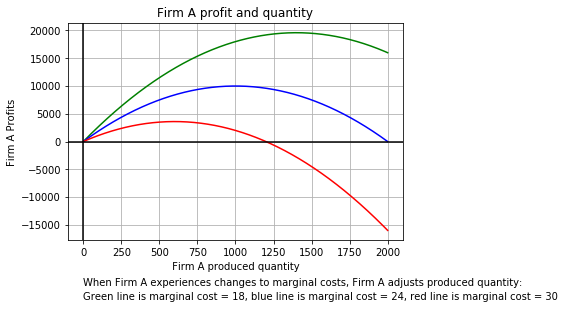

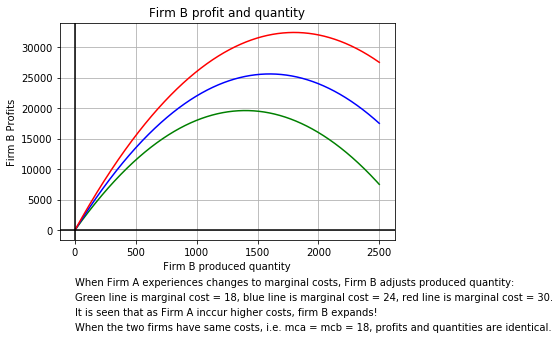

In [14]:
#Profit functions for firm A
Firm_low_mc_a = lambda qa: qa*(a-qb_l-qa)/b - mca_l*qa
Firm_med_mc_a = lambda qa: qa*(a-qb_m-qa)/b - mca_m*qa
Firm_high_mc_a = lambda qa: qa*(a-qb_h-qa)/b - mca_h*qa
#profit functions for firm B

qa = np.linspace(0, 2000, 2000)
# Returns numbers between 0 and 2500. 0 is intuitive; you't can't produce negative amounts. 2500 is chosen according to visual preferences
#demand parameters
a = 6000
b = 100
### Firm A lines###
#different quantites by firm B
qb_l = 1400
qb_m = 1600
qb_h = 1800
#different marginal costs
mca_l = 18
mca_m = 24
mca_h = 30

###Firm B lines, when firm A faces changes to marginal costs####

#Profit functions for firm A
B_Firm_low_mc_a = lambda qb: qb*(a-qb-qa_low_mc)/b - mcb*qb
B_Firm_med_mc_a = lambda qb: qb*(a-qb-qa_med_mc)/b - mcb*qb
B_Firm_high_mc_a = lambda qb: qb*(a-qb-qa_high_mc)/b - mcb*qb
#profit functions for firm B
qb = np.linspace(0, 2500, 2000)
qa_low_mc = 1400
qa_med_mc = 1000
qa_high_mc = 600
mcb = 18



#Simulating how a change in the marginal costs would affect firm a behavior, taking into account that equillibrium price changes when firms
#are faced with different costs.
#We used the above calculator to simulate how the equillibrium price would change, if the marginal cost
#of firm a changed. We held the marginal cost of firm b constant.

plt.plot(qa, Firm_low_mc_a(qa), color = 'g') 
plt.plot(qa, Firm_med_mc_a(qa), color = 'b') 
plt.plot(qa, Firm_high_mc_a(qa), color = 'r') 
plt.axhline(y=0.5, color ='k')
plt.axvline(x=0, color ='k')
plt.xlabel(" Firm A produced quantity ")
plt.ylabel("Firm A Profits")
plt.title('Firm A profit and quantity')
plt.text(0,-26000,'When Firm A experiences changes to marginal costs, Firm A adjusts produced quantity:')
plt.text(0,-28500,'Green line is marginal cost = 18, blue line is marginal cost = 24, red line is marginal cost = 30')
plt.grid()
plt.show()

plt.plot(qb, B_Firm_low_mc_a(qb), color = 'g') 
plt.plot(qb, B_Firm_med_mc_a(qb), color = 'b') 
plt.plot(qb, B_Firm_high_mc_a(qb), color = 'r') 
plt.axhline(y=0.5, color ='k')
plt.axvline(x=0, color ='k')
plt.xlabel(" Firm B produced quantity ")
plt.ylabel("Firm B Profits")
plt.title('Firm B profit and quantity')
plt.text(0,-9000,'When Firm A experiences changes to marginal costs, Firm B adjusts produced quantity:')
plt.text(0,-11500, 'Green line is marginal cost = 18, blue line is marginal cost = 24, red line is marginal cost = 30.')
plt.text(0,-14000, 'It is seen that as Firm A inccur higher costs, firm B expands!')
plt.text(0,-16500, 'When the two firms have same costs, i.e. mca = mcb = 18, profits and quantities are identical.')
plt.grid()
plt.show()


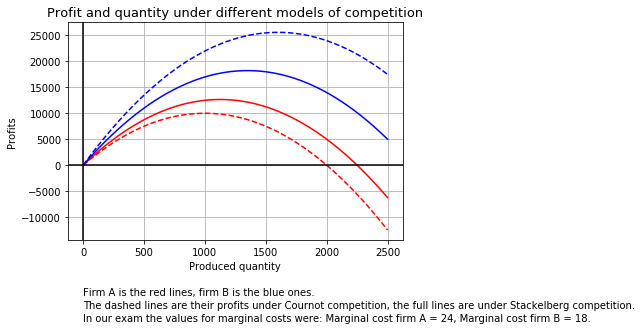

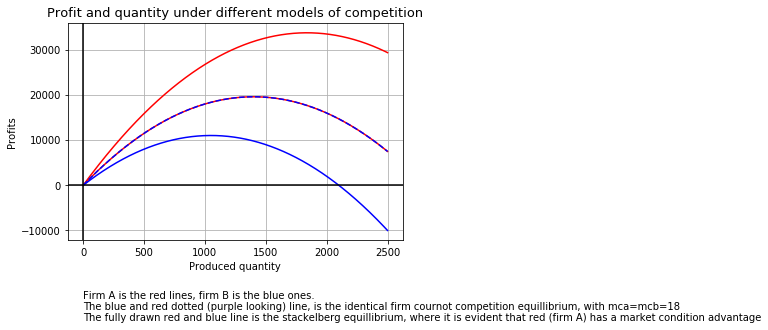

In [15]:
############################################################################################
####### Code for generating equal marginal cost Cournot and stackelberg equillibrium #######
############################################################################################


#### Code for generating profit functions for firm A, under Cournot and Stackelberg competition:
C_firm_a = lambda qa: qa*(a-C_qb-qa)/b - mca*qa
B_firm_a = lambda qa: qa*(a-B_qb-qa)/b - mca*qa
#Code for generating profit functions for firm A, under Cournot and Stackelberg competition:
C_firm_b = lambda qb: qb*(a-B_qa-qb)/b - mcb*qb
B_firm_b = lambda qb: qb*(a-C_qa-qa)/b - mcb*qb

# Generates numbers between 0 and 2500. 0 is intuitive; you't can't produce negative amounts. 2500 is chosen according to visual preference 
qa = np.linspace(0, 2500, 2000)
qb = np.linspace(0, 2500, 2000)
#Setting parameters according to the values in the exam
a = 6000
mca = 24
mcb = 18
b = 100
# Firm A quantities
C_qa = 1000
B_qa = 1500
# Firm B quantites
C_qb = 1350
B_qb = 1600


#Now we want to plot the profit functions. The dashed lines will be Cournot competition and the filled lines will be Stackelberg competition.
plt.plot(qa, C_firm_a(qa), color='r') 
plt.plot(qa, B_firm_a(qa), linestyle='dashed', color='r') 
plt.plot(qb, C_firm_b(qb), color="b" ) 
plt.plot(qb, B_firm_b(qb), linestyle='dashed', color="b") 
plt.axhline(y=0.5, color ='k')
plt.axvline(x=1, color ='k') 
plt.xlabel("Produced quantity")
plt.ylabel("Profits")
plt.title('Profit and quantity under different models of competition', fontsize=13)
plt.text(0,-25000,'Firm A is the red lines, firm B is the blue ones.')
plt.text(0,-27500,'The dashed lines are their profits under Cournot competition, the full lines are under Stackelberg competition.')
plt.text(0,-30000,'In our exam the values for marginal costs were: Marginal cost firm A = 24, Marginal cost firm B = 18.')
plt.grid()
plt.show()

############################################################################################
####### Code for generating equal marginal cost Cournot and stackelberg equillibrium #######
############################################################################################

#### Code for generating profit functions for firm A, under Cournot and Stackelberg competition:
i_C_firm_a = lambda qa: qa*(a-i_C_qb-qa)/b - i_mca*qa
i_B_firm_a = lambda qa: qa*(a-i_B_qb-qa)/b - i_mca*qa
#Code for generating profit functions for firm A, under Cournot and Stackelberg competition:
i_C_firm_b = lambda qb: qb*(a-i_B_qa-qb)/b - i_mcb*qb
i_B_firm_b = lambda qb: qb*(a-i_C_qa-qa)/b - i_mcb*qb


#Setting parameters values
#marginal cost
i_mca = 18
i_mcb = 18
# Firm A quantities
i_C_qa = 1400
i_B_qa = 2100
# Firm B quantites
i_C_qb = 1400
i_B_qb = 525


#Now we want to plot the profit functions. The dashed lines will be Cournot competition and the filled lines will be Stackelberg competition.
plt.plot(qa, i_C_firm_a(qa), color='r') 
plt.plot(qa, i_B_firm_a(qa), color='r') 
plt.plot(qb, i_C_firm_b(qb), color="b" ) 
plt.plot(qb, i_B_firm_b(qb), linestyle='dashed', color="b") 
plt.axhline(y=0.5, color ='k')
plt.axvline(x=0, color ='k') 
plt.xlabel("Produced quantity")
plt.ylabel("Profits")
plt.title('Profit and quantity under different models of competition', fontsize=13)
plt.text(0,-25000,'Firm A is the red lines, firm B is the blue ones.')
plt.text(0,-27500,'The blue and red dotted (purple looking) line, is the identical firm cournot competition equillibrium, with mca=mcb=18')
plt.text(0,-30000,'The fully drawn red and blue line is the stackelberg equillibrium, where it is evident that red (firm A) has a market condition advantage')
plt.grid()
plt.show()

In [16]:
############################################################################################
####### Code for solving the Cournot competition model with identical marginal costs #######
############################################################################################


# Importing scipy numpy array

from scipy import optimize,arange
from numpy import array




#Defining inverse demand, which is equal to price.

def price(x1,x2,b):
    return A/B-x1/B-b*x2/B



#Setting baseline parameters equal to the exam parameters.
A = 6000
B = 100

#Defining the cost function. Assuming constant marginal costs.

def costs(x,c):
    costs = c*x
    return costs

#Defining the profit function.

def profit_function(x1,x2,c1,b):
    return price(x1,x2,b)*x1-costs(x1,c1)



#Defining the reaction function. Scipy only has numerical minimizers, so we multiply profits by -1, minimize that. 
#Minimizing negative profits, is the same as aximizing positive profits.
def react(x2,c1,b):
    x1 = optimize.brute(lambda x: -profit_function(x,x2,c1,b), ((0,1,),)) 
                                                                 
    return x1[0]


# Creating a vector of parameters for the degree of homogeneity of products (b), and costs (c1,c2). 
#The vector is then, V = [b,c1,c2]
def vector_react(x,parameters): 
    return array(x)-array([react(x[1],parameters[1],parameters[0]),react(x[0],parameters[2],parameters[0])])

#Setting the remaining exam parameters. Homogeneity is 1. Marginal costs for firm A is 24. Marginal costs for firm B is 18.
parameters = [1.0,24,18]

#Setting initial guess:
x0 = [0.3, 0.3]

Solution_numerical = optimize.fsolve(vector_react, x0, args = (parameters))
#The solution is then:
Solution_numerical


array([1000.00000119, 1600.0000012 ])

*This project was about solving one of the assignments in our Microeconomics 1 exam paper. We derived the same results as the answer sheet, through both numerically and analytically solving the Cournot competition model. We had some plots where we used the Stackelberg competition model to graphically evaluate how the change in market conditions led to firm A having a major advantage over firm B, despite the fact that firm B had lower marginal costs than firm A*